In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [5]:
zip_file_path = '/content/archive.zip'

extracted_folder_path = '/content/dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [7]:
img_height, img_width = 224, 224
num_classes = 7
batch_size = 32

train_data_dir = '/content/dataset/train'
test_data_dir = '/content/dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:

with tf.device('/device:GPU:0'):
  epochs = 3
  history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/3
898/898 [==============================] - 409s 456ms/step - loss: 1.8444 - accuracy: 0.2433 - val_loss: 1.8135 - val_accuracy: 0.2471
Epoch 2/3
898/898 [==============================] - 405s 451ms/step - loss: 1.8225 - accuracy: 0.2513 - val_loss: 1.8165 - val_accuracy: 0.2471
Epoch 3/3
898/898 [==============================] - 407s 453ms/step - loss: 1.8138 - accuracy: 0.2513 - val_loss: 1.8106 - val_accuracy: 0.2471


1/1 [==============================] - 0s 24ms/step
True Label: happy
Predicted Label: happy


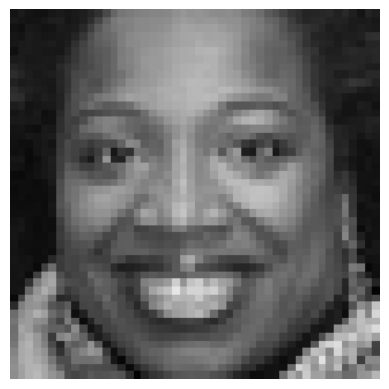

In [19]:
def predict_and_display(model, test_generator, index):

    img_path = test_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)

    predicted_label = np.argmax(predictions)
    true_label = test_generator.classes[index]

    predicted_class_name = list(test_generator.class_indices.keys())[predicted_label]
    true_class_name = list(test_generator.class_indices.keys())[true_label]

    plt.imshow(img)
    plt.axis('off')

    print("True Label:", true_class_name)
    print("Predicted Label:", predicted_class_name)

    plt.show()

index_to_predict = 3500

predict_and_display(model, test_generator, index_to_predict)